# Load data from log:


In [24]:
import numpy as np
data = []
with open('../logs/log6.txt') as f:
    for i, line in enumerate(f):
        line = line.strip()
        if i >= 27:
            line = line.split()
            if len(line) == 8:
#                 print(i, line)
                # left, right, headign, rate 
                data.append([line[1], line[3], line[5], line[7]])
data = np.array(data).astype(float)
print(data)

[[ 0.00000000e+00  0.00000000e+00  5.45814025e+02  1.63333000e-01]
 [ 0.00000000e+00  0.00000000e+00  5.45814025e+02 -2.74167000e-01]
 [ 0.00000000e+00  0.00000000e+00  5.45814025e+02 -8.16670000e-02]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.62098632e+02  4.43333000e-01]
 [ 0.00000000e+00  0.00000000e+00  1.62098632e+02 -5.54170000e-02]
 [ 0.00000000e+00  0.00000000e+00  1.62098632e+02 -1.16670000e-02]]


In [10]:
k = 11.92/3.
k

3.973333333333333

# Show data:

<IPython.core.display.Javascript object>


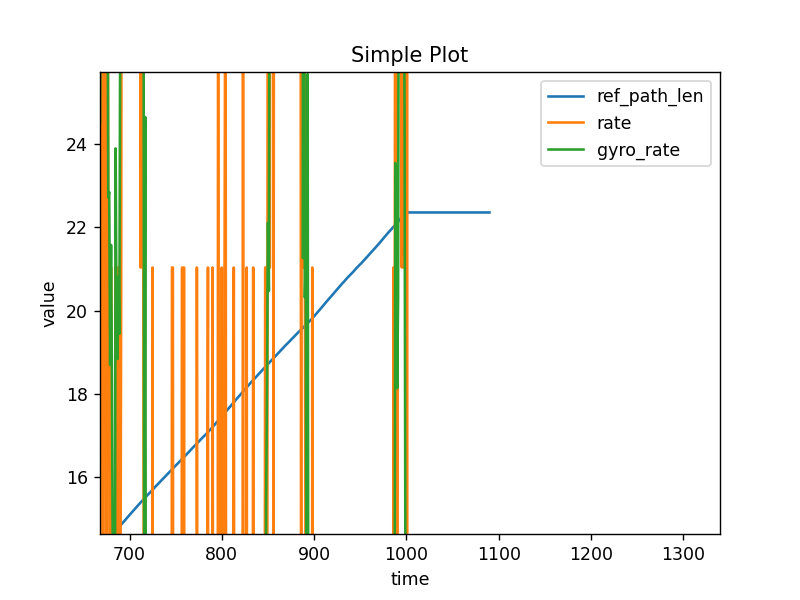

In [62]:
import matplotlib.pyplot as plt
import scipy.signal
%matplotlib notebook

dt = 0.1
pulses_per_revolution = 20.
wheel_d = 0.065
base = 0.14 # base of robot 

# calculate wheel speeds
l_r_speed = ((data[:,:2] / pulses_per_revolution * np.pi * wheel_d) / dt) / k

# calculate common speed of reference point
ref_speed = (l_r_speed[:,0] + l_r_speed[:,1]) / 2.0

# filtred speed
flt_ref_speed = scipy.signal.savgol_filter(ref_speed, 7, 1)

# calculate angular rate by wheels speeds
rate = -((l_r_speed[:,0] - l_r_speed[:,1]) / base) / np.pi * 180.
flt_rate = scipy.signal.savgol_filter(rate, 7, 1)

ref_path_len = np.cumsum(ref_speed) * dt

fig, ax = plt.subplots()  # Create a figure and an axes
# ax.plot(data[:,0], label='left_imp')
# ax.plot(l_r_speed[:, 0], label='left_speed')
# ax.plot(l_r_speed[:, 1], label='right_speed')
# ax.plot(ref_speed, label='ref_speed')
ax.plot(ref_path_len, label='ref_path_len')


# ax.plot(flt_ref_speed, label='flt_ref_speed')
ax.plot(rate, label='rate')
# ax.plot(flt_rate, label='flt_rate')

# ax.plot(data[:,1], label='right_imp')

gyro_heading = data[:,2]
# ax.plot(gyro_heading, label='heading')

gyro_rate = data[:,3]
ax.plot(gyro_rate, label='gyro_rate')

ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('value')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()



# Отображение пройденного пути:


<IPython.core.display.Javascript object>


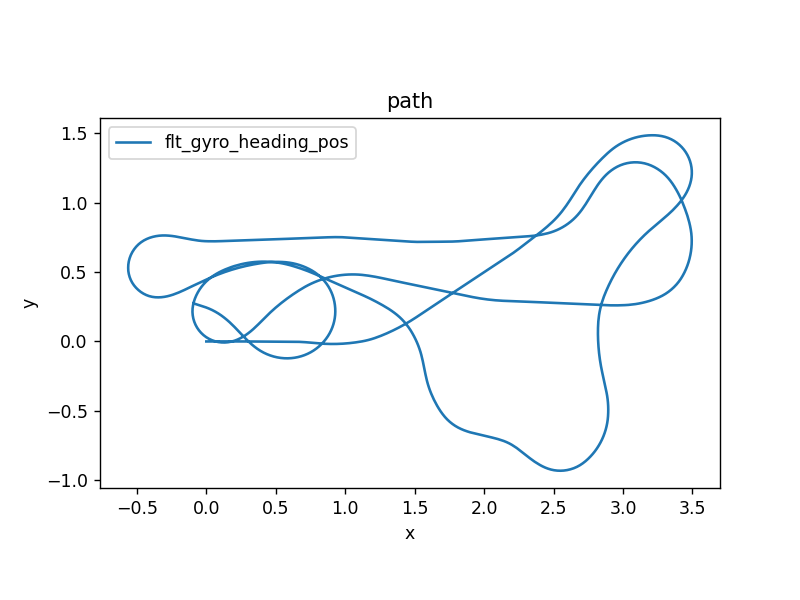

<IPython.core.display.Javascript object>


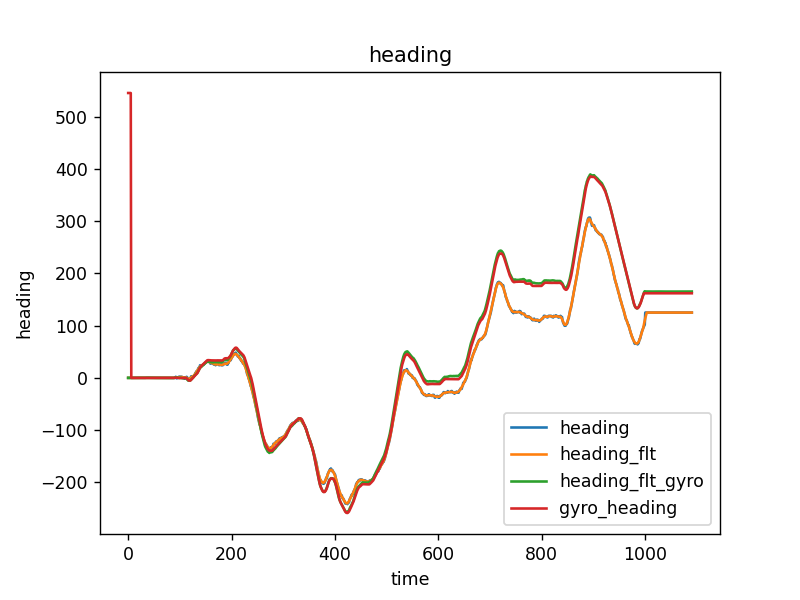

In [59]:
import math
# calculate x,y:
h = 0.
x = 0.
y = 0.

# not filtred data
res = []
for v, w in zip(ref_speed, rate):
    h += math.radians(w) * dt
    x += v * math.cos(h) * dt
    y += v * math.sin(h) * dt
    res.append((x,y,h))
res = np.array(res)


# filtred_data
h = 0.
x = 0.
y = 0.
flt_res = []
for v, w in zip(flt_ref_speed, flt_rate):
    h += math.radians(w) * dt
    x += v * math.cos(h) * dt
    y += v * math.sin(h) * dt
    flt_res.append((x,y,h))
flt_res = np.array(flt_res)

# filtred_with_gyro_rate
h = 0.
x = 0.
y = 0.
flt_gyro_res = []
for v, w in zip(flt_ref_speed, gyro_rate):
    h += math.radians(w) * dt
    x += v * math.cos(h) * dt
    y += v * math.sin(h) * dt
    flt_gyro_res.append((x,y,h))
flt_gyro_res = np.array(flt_gyro_res)



# filtred_with_gyro_headign
h = 0.
x = 0.
y = 0.
flt_gyro_heading_res = []
# h_base = gyro_heading[0]

for v, h in zip(flt_ref_speed, gyro_heading):
    h = math.radians(h)
    x += v * math.cos(h) * dt
    y += v * math.sin(h) * dt
    flt_gyro_heading_res.append((x,y,h))
flt_gyro_heading_res = np.array(flt_gyro_heading_res)


fig, ax = plt.subplots()  # Create a figure and an axes
ax.set_aspect(1)
# ax.plot(res[:,0], res[:,1], label='pos')
# ax.plot(flt_res[:,0], flt_res[:,1], label='flt_pos')
# ax.plot(flt_gyro_res[:,0], flt_gyro_res[:,1], label='flt_gyro_rate_pos')
ax.plot(flt_gyro_heading_res[:,0], flt_gyro_heading_res[:,1], label='flt_gyro_heading_pos')

ax.set_xlabel('x')  # Add an x-label to the axes.
ax.set_ylabel('y')  # Add a y-label to the axes.
ax.set_title("path")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

fig, ax = plt.subplots()  # Create a figure and an axes
ax.plot(res[:,2] / np.pi * 180, label='heading')
ax.plot(flt_res[:,2] / np.pi * 180., label='heading_flt')
ax.plot(flt_gyro_res[:,2] / np.pi * 180., label='heading_flt_gyro')
ax.plot(gyro_heading, label='gyro_heading')

ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('heading')  # Add a y-label to the axes.
ax.set_title("heading")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()
